# Example 2d GP in Mass-Accretion space

## Imports etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy

In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib as mpl

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
np.set_printoptions(linewidth=1000)

mpl.rcParams.update({
    "figure.dpi": 200,                    
    "font.size": 10,
    # Ticks
    "ytick.right": True,
    "ytick.direction": "in",
    "ytick.minor.visible": False,
    "xtick.top": True,
    "xtick.direction": "in",
    "xtick.minor.visible": False,
    "lines.linewidth" : 0.8,
    "lines.markersize" : 3,


})

# Data

In [23]:
data = np.load("adaptive_bins_all_gamma_m_13_15_chi2_processed_hr_1000.npy")



mean_mass = np.mean(data[:,:2], axis=1)
mean_gamma = np.mean(data[:,2:4], axis=1)
chi2 = data[:,4]

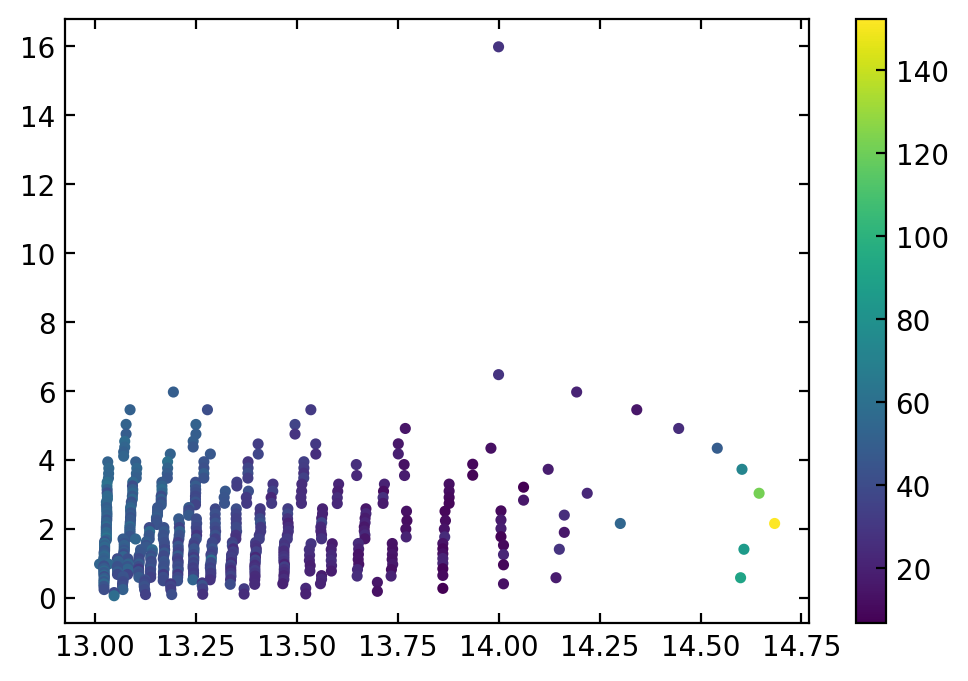

In [32]:
fig, ax = plt.subplots()
img = ax.scatter(mean_mass, mean_gamma, c=chi2)
fig.colorbar(img)

# GP

In [115]:
# Construct the data and target vectors - each row is a single data point
x = np.concatenate((mean_mass.reshape(-1, 1), mean_gamma.reshape(-1, 1)), axis=1)
y = chi2.reshape(-1, 1)

# Specify a 2d RBF kernel with some initial values. These aren't that important because we optimize them below
# Important that we have different length scales for the different axes
k = GPy.kern.RBF(2, variance=0.1, lengthscale=[5, 1], ARD=True)
m = GPy.models.GPRegression(x, y, k)

In [116]:
m.optimize(messages=True)

In [104]:
# Construct a test grid so that we can check if this is any good
xx, yy = np.meshgrid(np.linspace(13, 14.5), np.linspace(0, 6))
test_x = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), axis=1)

In [105]:
# Use the GP to predict the y values at the x in our test grid
test_y = m.predict(test_x)

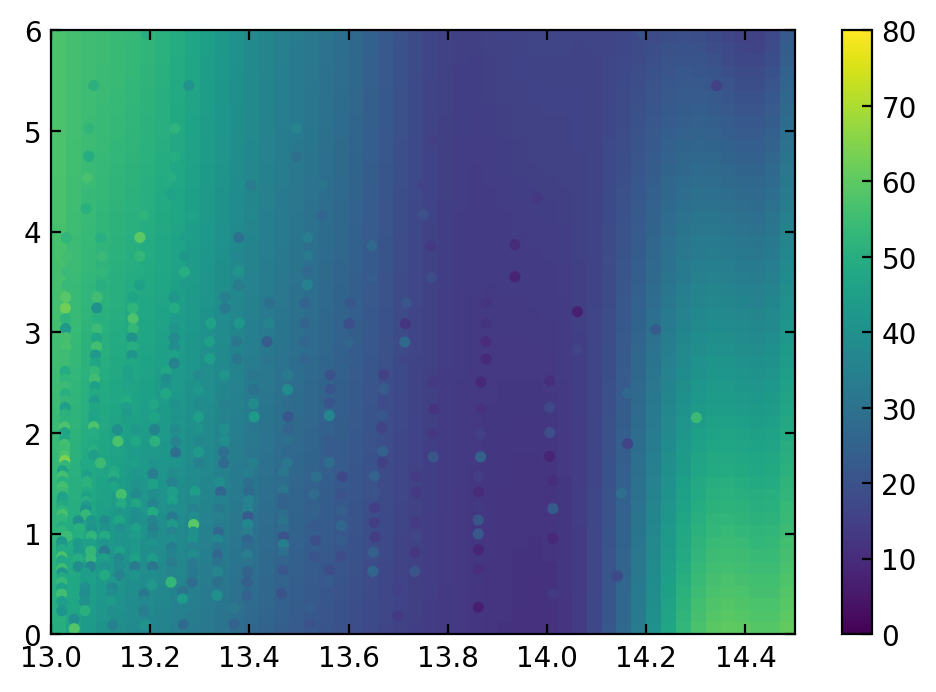

In [119]:
# Plot the training points on the test grid to see if it is close
c_max = 80

fig, ax = plt.subplots()
img = ax.imshow(
    test_y[0].reshape(xx.shape),
    origin="lower",
    extent=[xx[0][0], xx[0][-1], yy[0][0], yy[-1][0]],
    aspect="auto",
)
img.set_clim(0, c_max)

img2 = ax.scatter(mean_mass, mean_gamma, c=chi2)
img2.set_clim(0, c_max)

ax.set(
    xlim=(xx[0][0], xx[0][-1]),
    ylim=(yy[0][0], yy[-1][0]),
)
fig.colorbar(img)

# Doesn't look too bad...

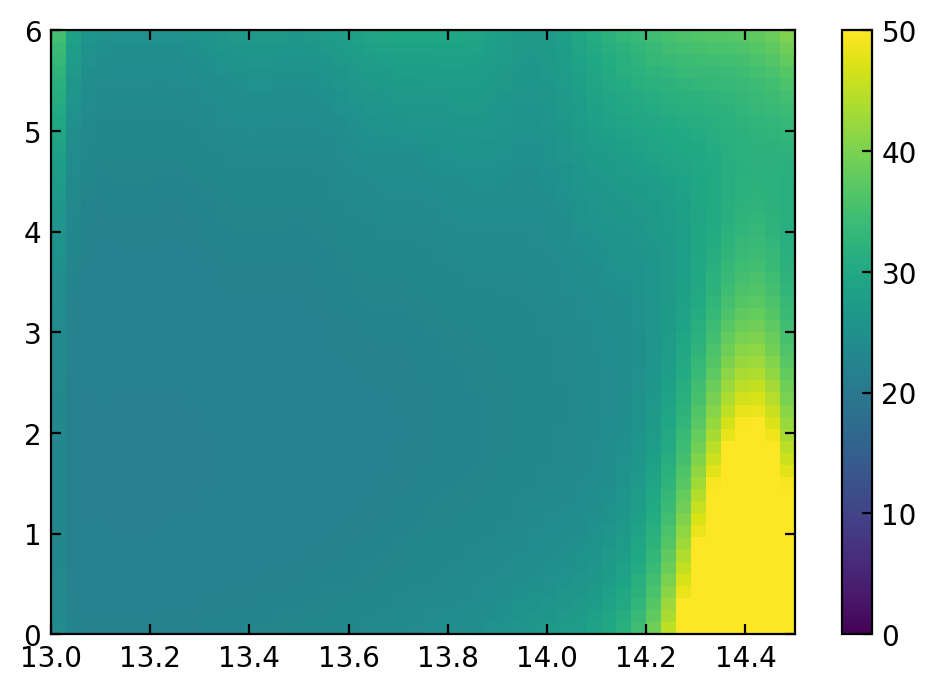

In [120]:
# Plot the uncertainties. These are quite high
# It looks like there is a decent uncertainty on the data? Nearby points often have quite different chi2?
fig, ax = plt.subplots()
img = ax.imshow(
    test_y[1].reshape(xx.shape),
    origin="lower",
    extent=[xx[0][0], xx[0][-1], yy[0][0], yy[-1][0]],
    aspect="auto",
)
fig.colorbar(img)
img.set_clim(0, 50)